In [89]:
# lab 2

#An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

#Some business Objectives:

#Retain customers,
#Analyze relevant customer data,
#Develop focused customer retention programs.
#Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

#Instructions
#Import the necessary libraries.
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.
#First look at its main features (head, shape, info).
#Rename the columns so they follow the PE8 (snake case).
#Change effective to date column to datetime format.
#Check NaN values per column.
#Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
#For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
#Get categorical features.
#What should we do with the customer_id column?

In [90]:
#Import the necessary libraries.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [91]:
#Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [92]:
#First look at its main features (head, shape, info).

customer_df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [93]:
customer_df.shape

(9134, 24)

In [94]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [95]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [96]:
#Rename the columns so they follow the PE8 (snake case).

customer_df.columns = [e.replace(' ', '_') for e in customer_df.columns]

In [97]:
customer_df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [98]:
#Change effective to date column to datetime format.

customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'], errors = 'coerce')

In [99]:
customer_df.dtypes

Customer                                 object
State                                    object
Customer_Lifetime_Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective_To_Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location_Code                            object
Marital_Status                           object
Monthly_Premium_Auto                      int64
Months_Since_Last_Claim                   int64
Months_Since_Policy_Inception             int64
Number_of_Open_Complaints                 int64
Number_of_Policies                        int64
Policy_Type                              object
Policy                                   object
Renew_Offer_Type                         object
Sales_Channel                           

In [100]:
#Check NaN values per column.

nulls = pd.DataFrame(customer_df.isna().sum()/len(customer_df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

column_name  Percentage Null Values
0                        Customer                     0.0
1                           State                     0.0
22                  Vehicle_Class                     0.0
21             Total_Claim_Amount                     0.0
20                  Sales_Channel                     0.0
19               Renew_Offer_Type                     0.0
18                         Policy                     0.0
17                    Policy_Type                     0.0
16             Number_of_Policies                     0.0
15      Number_of_Open_Complaints                     0.0
14  Months_Since_Policy_Inception                     0.0
13        Months_Since_Last_Claim                     0.0
12           Monthly_Premium_Auto                     0.0
11                 Marital_Status                     0.0
10                  Location_Code                     0.0
9                          Income                     0.0
8                          Gender                     0.0
7                EmploymentStatus                     0.0
6               Effective_To_Date                     0.0
5                       Education                     0.0
4                        Coverage                     0.0
3                        Response                     0.0
2         Customer_Lifetime_Value                     0.0
23                   Vehicle_Size                     0.0

In [101]:
nulls = pd.DataFrame(customer_df.isna().sum())
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Number of Null Values']
nulls.sort_values(by='Number of Null Values', ascending = False)

column_name  Number of Null Values
0                        Customer                      0
1                           State                      0
22                  Vehicle_Class                      0
21             Total_Claim_Amount                      0
20                  Sales_Channel                      0
19               Renew_Offer_Type                      0
18                         Policy                      0
17                    Policy_Type                      0
16             Number_of_Policies                      0
15      Number_of_Open_Complaints                      0
14  Months_Since_Policy_Inception                      0
13        Months_Since_Last_Claim                      0
12           Monthly_Premium_Auto                      0
11                 Marital_Status                      0
10                  Location_Code                      0
9                          Income                      0
8                          Gender                      0
7                EmploymentStatus                      0
6               Effective_To_Date                      0
5                       Education                      0
4                        Coverage                      0
3                        Response                      0
2         Customer_Lifetime_Value                      0
23                   Vehicle_Size                      0

In [102]:
# Since there are no null values we check the data

customer_df.describe()

Customer_Lifetime_Value        Income  Monthly_Premium_Auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months_Since_Last_Claim  Months_Since_Policy_Inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number_of_Open_Complaints  Number_of_Policies  Total_Claim_Amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

In [103]:
# The first quartile for income variable has too many 0.00

customer_df['Income'].value_counts()

# Length: n of unique values

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: Income, Length: 5694, dtype: int64

In [104]:
# To avoid  the large amount of zeros affecting our analysis 
# we replace the zeros with the median

median_income = customer_df['Income'].median(skipna = True)
customer_df['Income'] = customer_df.Income.mask(customer_df.Income == 0, median_income)

In [105]:
customer_df['Income'].value_counts()

33889.5    2317
95697.0      12
20978.0       7
40864.0       7
61108.0       7
           ... 
18779.0       1
61085.0       1
25074.0       1
49057.0       1
18944.0       1
Name: Income, Length: 5694, dtype: int64

In [106]:
# Define a function that differentiates between continuous and discrete variables. 
# Hint: A number of unique values might be useful. 
# Store continuous data into a continuous variable and do the same for discrete and categorical.

numerical_data = customer_df.select_dtypes(np.number)
numerical_data.head()


Customer_Lifetime_Value   Income  Monthly_Premium_Auto  \
0              2763.519279  56274.0                    69   
1              6979.535903  33889.5                    94   
2             12887.431650  48767.0                   108   
3              7645.861827  33889.5                   106   
4              2813.692575  43836.0                    73   

   Months_Since_Last_Claim  Months_Since_Policy_Inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   Number_of_Open_Complaints  Number_of_Policies  Total_Claim_Amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          566.472247  
3                          0                   7          529.881344  
4                          0                   1          138.130879

In [107]:
# Divide numerical data into continuous and discrete

numerical_data.nunique()

Customer_Lifetime_Value          8041
Income                           5694
Monthly_Premium_Auto              202
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
Total_Claim_Amount               5106
dtype: int64

In [108]:
# Columns with less unique values than 10% of the full dataset are most likely discrete

discrete_data = [i for i in numerical_data if (len(numerical_data[i].unique()) < (numerical_data.shape[0] * 0.01))]


In [109]:
discrete_data

['Months_Since_Last_Claim', 'Number_of_Open_Complaints', 'Number_of_Policies']

In [110]:
continuous_data = list(numerical_data.drop(columns = discrete_data).columns)

In [111]:
continuous_data

['Customer_Lifetime_Value',
 'Income',
 'Monthly_Premium_Auto',
 'Months_Since_Policy_Inception',
 'Total_Claim_Amount']

In [112]:
categorical_data = customer_df.select_dtypes(object)

In [113]:
categorical_data.nunique()

Customer            9134
State                  5
Response               2
Coverage               3
Education              5
EmploymentStatus       5
Gender                 2
Location_Code          3
Marital_Status         3
Policy_Type            3
Policy                 9
Renew_Offer_Type       4
Sales_Channel          4
Vehicle_Class          6
Vehicle_Size           3
dtype: int64

In [114]:
# create continuous and discrete data frame

continuous_df = numerical_data.drop(columns = discrete_data)
continuous_df.head()


Customer_Lifetime_Value   Income  Monthly_Premium_Auto  \
0              2763.519279  56274.0                    69   
1              6979.535903  33889.5                    94   
2             12887.431650  48767.0                   108   
3              7645.861827  33889.5                   106   
4              2813.692575  43836.0                    73   

   Months_Since_Policy_Inception  Total_Claim_Amount  
0                              5          384.811147  
1                             42         1131.464935  
2                             38          566.472247  
3                             65          529.881344  
4                             44          138.130879

In [115]:
discrete_df = numerical_data[discrete_data]
discrete_df.head()

Months_Since_Last_Claim  Number_of_Open_Complaints  Number_of_Policies
0                       32                          0                   1
1                       13                          0                   8
2                       18                          0                   2
3                       18                          0                   7
4                       12                          0                   1

In [116]:
# Lab 4 feature extraction

In [117]:
# For this lab, we will be using the same dataset we used in the previous labs. 
#We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

# Instructions
# Open the categoricals variable we created before.


In [118]:
categorical_df = categorical_data
categorical_df.head()

Customer       State Response  Coverage Education EmploymentStatus Gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  Location_Code Marital_Status     Policy_Type        Policy Renew_Offer_Type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  Sales_Channel  Vehicle_Class Vehicle_Size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize  
3   Call Center            SUV      Medsize  
4         Agent  Four-Door Car      Medsize

In [119]:
# Lab 5

# Instructions
# So far we have worked on EDA. 
# This lab will focus on data cleaning and wrangling from everything we noticed before.

# We will start with removing outliers. 
# So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. 
# Use the function to remove the outliers and apply it to the dataframe.
# Create a copy of the dataframe for the data wrangling.
# Normalize the continuous variables. You can use any one method you want.
# Encode the categorical variables
# The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
# Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
# Hint for Categorical Variables

#You should deal with the categorical variables as shown below 
# (for ordinal encoding, dummy code has been provided as well):

# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

# data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.



In [120]:
# We will start with removing outliers. 
# So far, we have discussed different methods to remove outliers. 
# Use the one you feel more comfortable with, define a function for that. 

def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [121]:
CLV_outliers = outliers(customer_df['Customer_Lifetime_Value'])
MPA_outliers = outliers(customer_df['Monthly_Premium_Auto'])

In [122]:
# Create variable for outliers to drop

to_drop = CLV_outliers.index | MPA_outliers.index

In [123]:
# Create a copy of the dataframe for the data wrangling.

clean_customer_df = customer_df.drop(to_drop).reset_index(drop = True)   # Reset index


In [124]:
clean_customer_df.head()


Customer       State  Customer_Lifetime_Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective_To_Date EmploymentStatus Gender   Income Location_Code  \
0        2011-02-24         Employed      F  56274.0      Suburban   
1        2011-01-31       Unemployed      F  33889.5      Suburban   
2        2011-02-19         Employed      F  48767.0      Suburban   
3        2011-01-20       Unemployed      M  33889.5      Suburban   
4        2011-02-03         Employed      M  43836.0         Rural   

  Marital_Status  Monthly_Premium_Auto  Months_Since_Last_Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number_of_Policies     Policy_Type        Policy Renew_Offer_Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales_Channel  Total_Claim_Amount  Vehicle_Class Vehicle_Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

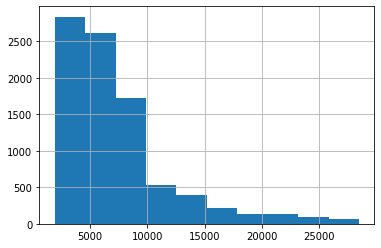

In [125]:

clean_customer_df["Customer_Lifetime_Value"].hist();


In [126]:
# We create a temporary file before wrangling the data

df_copy = clean_customer_df.copy()

In [127]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       8753 non-null   object        
 1   State                          8753 non-null   object        
 2   Customer_Lifetime_Value        8753 non-null   float64       
 3   Response                       8753 non-null   object        
 4   Coverage                       8753 non-null   object        
 5   Education                      8753 non-null   object        
 6   Effective_To_Date              8753 non-null   datetime64[ns]
 7   EmploymentStatus               8753 non-null   object        
 8   Gender                         8753 non-null   object        
 9   Income                         8753 non-null   float64       
 10  Location_Code                  8753 non-null   object        
 11  Marital_Status   

In [128]:
# Normalize the continuous variables. You can use any one method you want.

continuous_data.remove("Months_Since_Policy_Inception")
continuous_data.remove("Total_Claim_Amount")

In [129]:
# Normalize using function

for c in continuous_data:
    maximum = clean_customer_df[c].max()
    minimum = clean_customer_df[c].min()
    clean_customer_df[c] = clean_customer_df[c].apply(lambda x: (x - minimum) / (maximum - minimum))


In [130]:
clean_customer_df[continuous_data].head()

Customer_Lifetime_Value    Income  Monthly_Premium_Auto
0                 0.032522  0.514064              0.059259
1                 0.190941  0.265193              0.244444
2                 0.412934  0.430601              0.348148
3                 0.215979  0.265193              0.333333
4                 0.034407  0.375778              0.088889

In [134]:
# Encode the categorical variables

# We start with transforming 'Response' and 'Gender' into a booleans

clean_customer_df["Response"] = clean_customer_df["Response"].apply(lambda x: 1 if x == "Yes" else 0)
clean_customer_df["Gender"] = clean_customer_df["Gender"].apply(lambda x: 1 if x == "F" else 0)


In [135]:
# Binning to remove redundant data

# Education: We group Master and Doctor as 'Graduate'

clean_customer_df["Education"] = clean_customer_df["Education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x) 

# EmploymentStatus: Medical leave, Disabled, Retired as 'Inactive'

inactive = ["Medical Leave", "Disabled", "Retired"]
clean_customer_df["EmploymentStatus"] = clean_customer_df["EmploymentStatus"].apply(lambda x: "Inactive" if x in inactive else x)

# Vehicle_Class: Sports, Luxury SUV or CAR

luxury = ["Sports Car", "Luxury SUV", "Luxury Car"]
clean_customer_df["Vehicle_Class"] = clean_customer_df["Vehicle_Class"].apply(lambda x: "Luxury" if x in luxury else x)


In [136]:
# Create another copy 

final_df = clean_customer_df.copy()


In [139]:
# Ordinal encoding

ordinal = clean_customer_df.drop(columns = "Customer")
ordinal

State  Customer_Lifetime_Value  Response  Coverage Education  \
0     Washington                 0.032522         0     Basic  Bachelor   
1        Arizona                 0.190941         0  Extended  Bachelor   
2         Nevada                 0.412934         0   Premium  Bachelor   
3     California                 0.215979         0     Basic  Bachelor   
4     Washington                 0.034407         0     Basic  Bachelor   
...          ...                      ...       ...       ...       ...   
8748  California                 0.808175         0     Basic  Bachelor   
8749  California                 0.045034         0  Extended   College   
8750  California                 0.235444         0  Extended  Bachelor   
8751  California                 0.211417         0  Extended   College   
8752  California                 0.026823         0  Extended   College   

     Effective_To_Date EmploymentStatus  Gender    Income Location_Code  \
0           2011-02-24         Employed       1  0.514064      Suburban   
1           2011-01-31       Unemployed       1  0.265193      Suburban   
2           2011-02-19         Employed       1  0.430601      Suburban   
3           2011-01-20       Unemployed       0  0.265193      Suburban   
4           2011-02-03         Employed       0  0.375778         Rural   
...                ...              ...     ...       ...           ...   
8748        2011-02-10         Employed       0  0.688250         Urban   
8749        2011-02-12         Employed       1  0.128602      Suburban   
8750        2011-02-06       Unemployed       0  0.265193      Suburban   
8751        2011-02-03         Employed       0  0.132349      Suburban   
8752        2011-02-14       Unemployed       0  0.265193      Suburban   

     Marital_Status  Monthly_Premium_Auto  Months_Since_Last_Claim  \
0           Married              0.059259                       32   
1            Single              0.244444                       13   
2           Married              0.348148                       18   
3           Married              0.333333                       18   
4            Single              0.088889                       12   
...             ...                   ...                      ...   
8748        Married              0.088889                       18   
8749       Divorced              0.133333                       14   
8750         Single              0.177778                        9   
8751        Married              0.259259                       34   
8752         Single              0.118519                        3   

      Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
8748                             89                          0   
8749                             28                          0   
8750                             37                          3   
8751                              3                          0   
8752                             90                          0   

      Number_of_Policies     Policy_Type        Policy Renew_Offer_Type  \
0                      1  Corporate Auto  Corporate L3           Offer1   
1                      8   Personal Auto   Personal L3           Offer3   
2                      2   Personal Auto   Personal L3           Offer1   
3                      7  Corporate Auto  Corporate L2           Offer1   
4                      1   Personal Auto   Personal L1           Offer1   
...                  ...             ...           ...              ...   
8748                   2   Personal Auto   Persona

In [140]:
# We apply ordinal encoding to coverage, employmentstatus, location cose, and vehicle size

ordinal["Coverage"] = ordinal["Coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["EmploymentStatus"] = ordinal["EmploymentStatus"].map({"Unemployed" : 0, "Inactive" : 1, "Employed" : 2})
ordinal["Location_Code"] = ordinal["Location_Code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["Vehicle_Size"] = ordinal["Vehicle_Size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})


In [141]:
#ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          8753 non-null   object        
 1   Customer_Lifetime_Value        8753 non-null   float64       
 2   Response                       8753 non-null   int64         
 3   Coverage                       8753 non-null   int64         
 4   Education                      8753 non-null   object        
 5   Effective_To_Date              8753 non-null   datetime64[ns]
 6   EmploymentStatus               8753 non-null   int64         
 7   Gender                         8753 non-null   int64         
 8   Income                         8753 non-null   float64       
 9   Location_Code                  8753 non-null   int64         
 10  Marital_Status                 8753 non-null   object        
 11  Monthly_Premium_A

In [142]:
# One Hot Encoding

one_hot = ordinal.copy()

In [143]:
one_hot_columns = final_df.select_dtypes(include = object).columns[1:]
one_hot_columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location_Code',
       'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [144]:
# One hot encoders

# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

In [145]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_columns)
one_hot

Customer_Lifetime_Value  Response Effective_To_Date  Gender    Income  \
0                    0.032522         0        2011-02-24       1  0.514064   
1                    0.190941         0        2011-01-31       1  0.265193   
2                    0.412934         0        2011-02-19       1  0.430601   
3                    0.215979         0        2011-01-20       0  0.265193   
4                    0.034407         0        2011-02-03       0  0.375778   
...                       ...       ...               ...     ...       ...   
8748                 0.808175         0        2011-02-10       0  0.688250   
8749                 0.045034         0        2011-02-12       1  0.128602   
8750                 0.235444         0        2011-02-06       0  0.265193   
8751                 0.211417         0        2011-02-03       0  0.132349   
8752                 0.026823         0        2011-02-14       0  0.265193   

      Monthly_Premium_Auto  Months_Since_Last_Claim  \
0                 0.059259                       32   
1                 0.244444                       13   
2                 0.348148                       18   
3                 0.333333                       18   
4                 0.088889                       12   
...                    ...                      ...   
8748              0.088889                       18   
8749              0.133333                       14   
8750              0.177778                        9   
8751              0.259259                       34   
8752              0.118519                        3   

      Months_Since_Policy_Inception  Number_of_Open_Complaints  \
0                                 5                          0   
1                                42                          0   
2                                38                          0   
3                                65                          0   
4                                44                          0   
...                             ...                        ...   
8748                             89                          0   
8749                             28                          0   
8750                             37                          3   
8751                              3                          0   
8752                             90                          0   

      Number_of_Policies  Total_Claim_Amount  State_Arizona  State_California  \
0                      1          384.811147              0                 0   
1                      8         1131.464935              1                 0   
2                      2          566.472247              0                 0   
3                      7          529.881344              0                 1   
4                      1          138.130879              0                 0   
...                  ...                 ...            ...               ...   
8748                   2          198.234764              0                 1   
8749                   1          379.200000              0                 1   
8750                   2          790.784983              0                 1   
8751                   3          691.200000              0                 1   
8752                   1          369.600000              0                 1   

      State_Nevada  State_Oregon  State_Washington  Coverage_0  Coverage_1  \
0                0             0                 1           1           0   
1                0             0                 0           0           1   
2                1             0                 0           0           0   
3                0             0                 0           1           0   
4                0             0                 1           1           0   
...            ...           ...               ...         ...         ...   
8748             0             0                 0           1           0   
8749  

In [146]:
final_df = one_hot.copy()